In [2]:
#importing the required libraries from python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [6]:
#loading dataset
filename = 'F:\\Data Science - rahul notes\Machine Learning algorithms\Salary_Data.csv'
df = pd.read_csv(filename)
print(df)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


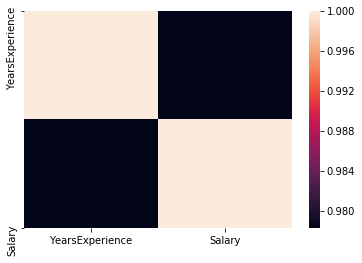

In [8]:
#plotting correlation 
df.corr()
sns.heatmap(df.corr())

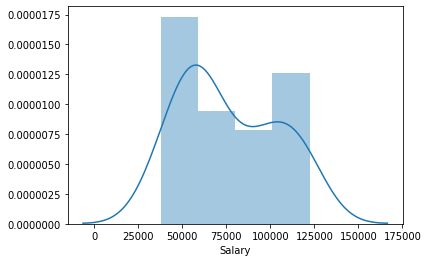

In [14]:
sns.distplot(df['Salary'])

In [15]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [20]:
#training the data
x = df[['YearsExperience']]
y = df['Salary']

In [21]:
#unsing train_test_split to divide the data into train_data and test_data
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.33, random_state = 0)

In [22]:
# crating and testing model
linear = LinearRegression()
#fitting the data into model
linear.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#printing coefficients and intercept
linear.intercept_

24941.532943487175

In [24]:
coefficients = pd.DataFrame(linear.coef_, x.columns, columns = ['coefficients'])
print(coefficients)

                 coefficients
YearsExperience   9578.492769


In [48]:
prediction = linear.predict(x_test)
print(prediction)

[ 39309.27209624 123600.00845907  64213.35329435  62297.65474065
 115937.21424426 108274.42002946 116895.06352111  63255.5040175
  75707.54461655 100611.62581466  52719.16197215  73791.84606285
  55592.7098027   68044.75040175 103485.17364521  90075.28376931
  37393.57354254 125515.70701277  53677.011249    46014.21703419
  81454.64027765]


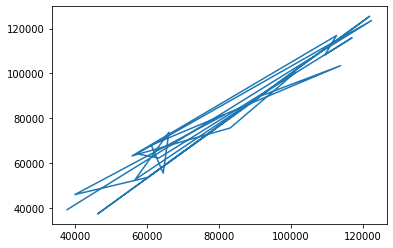

In [36]:
#plotting actual and predicted outputs
plt.plot(y_test,prediction)

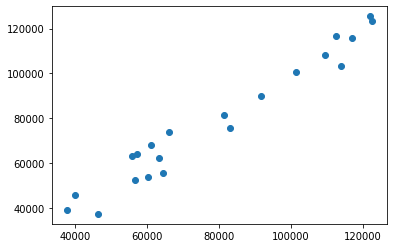

In [37]:
plt.scatter(y_test, prediction)

In [39]:
#evaluating the model
#Regression evaluation metrics
from sklearn import metrics
#Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4639.285178619258
MSE: 31840965.25684771
RMSE: 5642.779922772791


2     -1578.272096
28    -1209.008459
13    -7132.353294
10      920.345259
26     1031.785756
24     1156.579971
27    -4260.063521
11    -7461.504017
17     7380.455383
22      690.374185
5      3922.838028
16    -7762.846063
8      8852.290197
14    -6933.750402
23    10326.826355
20     1662.716231
1      8811.426457
29    -3643.707013
6      6472.988751
4     -6123.217034
18      -91.640278
Name: Salary, dtype: float64


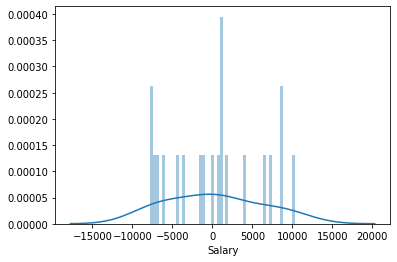

In [40]:
#Residuals
#Ploting a histogram of the residuals and making sure it looks normally distributed.
residual = y_test - prediction
print(residual)
sns.distplot(residual, bins = 50)
